<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/Genesis_test_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/breed_ads.csv')

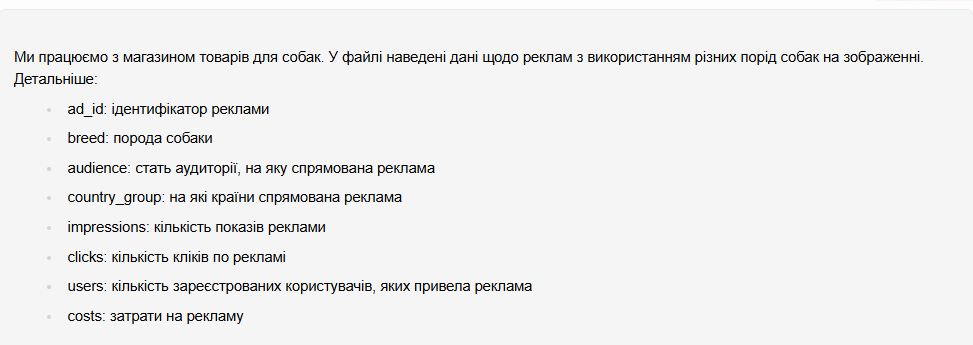

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ad_id          550 non-null    object 
 1   breed          550 non-null    object 
 2   audience       549 non-null    object 
 3   country_group  550 non-null    object 
 4   clicks         550 non-null    int64  
 5   impressions    550 non-null    int64  
 6   users          550 non-null    int64  
 7   costs          549 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 34.5+ KB


In [4]:
df.head()

,ad_id,breed,audience,country_group,clicks,impressions,users,costs
0,SFz8962b5gF9Z9WrglXpkSkLcZ0gVWsPGR0raDDGmPU=,breed_2,Male,Other,6181,108446,254,7381.01
1,XBY7gLyoZYUHnwrcb7CQXsXaQrL1VAaXxAR0C9ABqC0=,breed_1,Male,Tier1,1035,128367,151,5686.12
2,/krLoIPXKGCFXxCp6ENaU/3enKHu7toWnaK/PwylhvM=,breed_2,Male,Tier1,440417,69284146,2448,73456.71
3,OzzzUfAzWDs1OE6nCWYWaKxhMTB8TONA1jebmpvIvrI=,breed_1,Male,Other,38875,2902476,78,1137.61
4,vCYMDAhCERWSKiDte8Cq2DB7rlYb6NTKGUS662RiT30=,breed_2,Male,Tier1,108755,3174165,651,10204.15


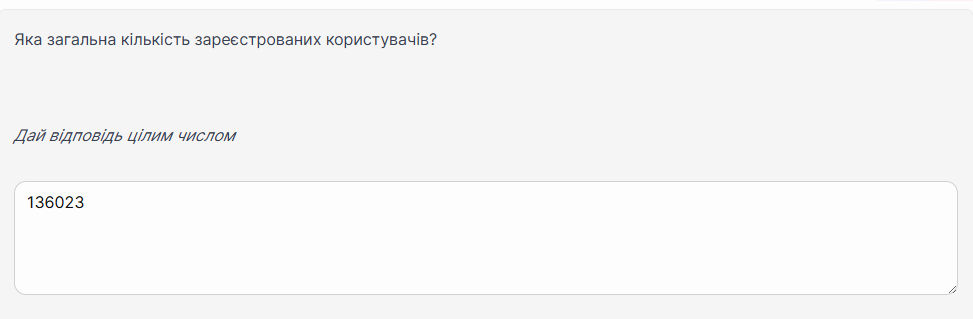

In [5]:
df.users.sum()

np.int64(136023)

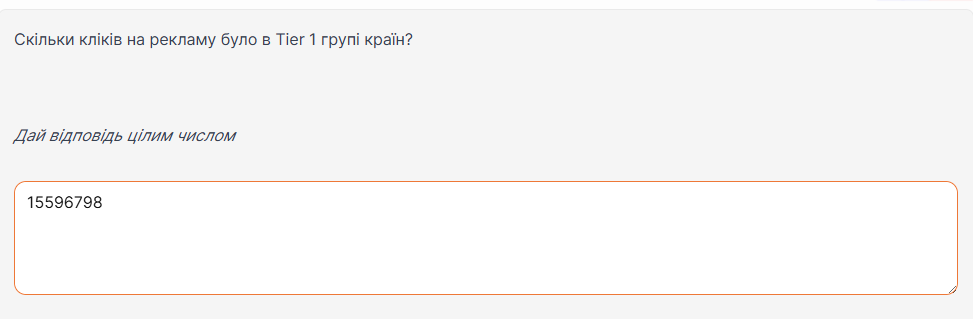

In [6]:
df.groupby('country_group').clicks.sum()

,clicks
country_group,
Other,85730061
Tier1,15596798


In [7]:
df.describe()

,clicks,impressions,users,costs
count,5.500000e+02,5.500000e+02,550.000000,549.000000
mean,1.842307e+05,1.959592e+07,247.314545,4031.341894
std,1.696878e+06,1.926254e+08,865.514582,10815.615086
min,1.500000e+01,3.630000e+02,10.000000,47.790000
25%,7.787500e+02,3.295175e+04,18.000000,394.140000
50%,3.747500e+03,1.517625e+05,36.000000,784.680000
75%,1.699900e+04,6.607190e+05,114.000000,2400.810000
max,3.216684e+07,2.994684e+09,8956.000000,136906.300000


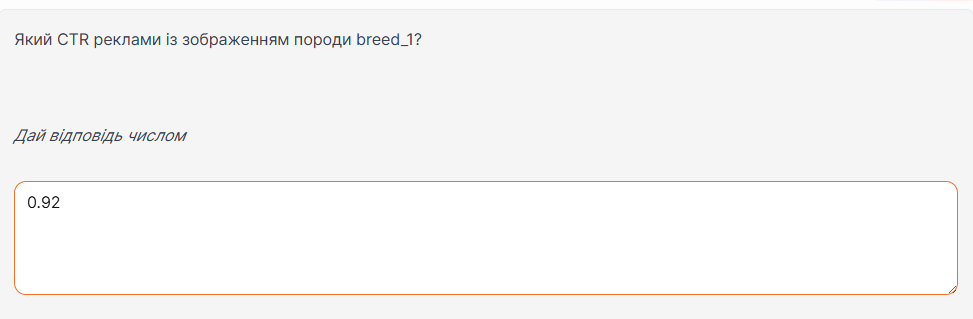

In [8]:
breed_1_df = df[df['breed'] == 'breed_1']
total_clicks = breed_1_df['clicks'].sum()
total_impressions = breed_1_df['impressions'].sum()

ctr = (total_clicks / total_impressions) * 100
print(f"CTR для breed_1: {ctr:.2f}%")

CTR для breed_1: 0.92%


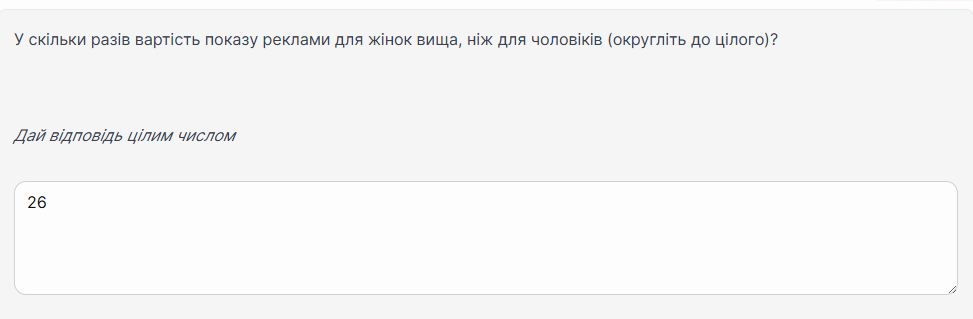

In [9]:
# Фільтруємо дані
df_women = df[df['audience'] == 'Female']
df_men = df[df['audience'] == 'Male']

# Сумарні покази та витрати
costs_women = df_women['costs'].sum()
impressions_women = df_women['impressions'].sum()

costs_men = df_men['costs'].sum()
impressions_men = df_men['impressions'].sum()

# Розрахунок CPM
cpm_women = (costs_women / impressions_women) * 1000
cpm_men = (costs_men / impressions_men) * 1000

# У скільки разів дорожче
ratio = cpm_women / cpm_men

print(f"CPM для жінок: {cpm_women:.2f}")
print(f"CPM для чоловіків: {cpm_men:.2f}")
print(f"Реклама для жінок дорожча у {ratio:.2f} раз(и)")

CPM для жінок: 4.85
CPM для чоловіків: 0.18
Реклама для жінок дорожча у 26.29 раз(и)


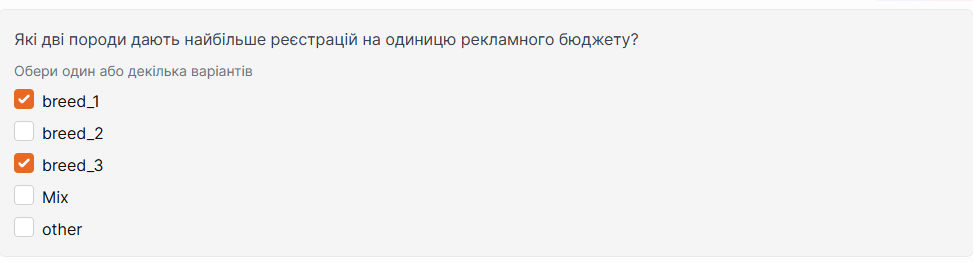

In [10]:
# Видаляємо рядки з пропущеними значеннями в costs
df_clean = df.dropna(subset=['costs'])

# Групуємо по породах та рахуємо суму users і costs
breed_grouped = df_clean.groupby('breed').agg({'users': 'sum', 'costs': 'sum'})

# Обчислюємо ефективність (користувачі на одиницю бюджету)
breed_grouped['efficiency'] = breed_grouped['users'] / breed_grouped['costs']

# Сортуємо від найефективнішої до найгіршої
top_breeds = breed_grouped.sort_values('efficiency', ascending=False).head(5)

print(top_breeds[['efficiency']])

         efficiency
breed              
breed_3    0.067990
breed_1    0.063846
breed_2    0.047257
other      0.036609
Mix        0.035239


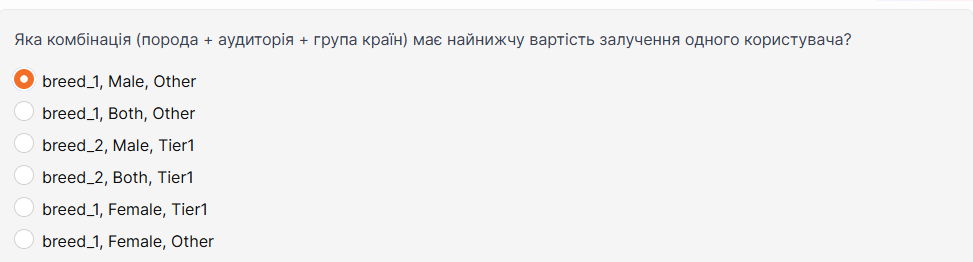

In [11]:
df_grouped = df_clean.groupby(['breed', 'audience', 'country_group']).agg({'users': 'sum', 'costs': 'sum'})
df_grouped['efficiency'] = df_grouped['costs']/df_grouped['users']
df_grouped.sort_values('efficiency')

,,,users,costs,efficiency
breed,audience,country_group,,,
breed_1,Male,Other,28049,132859.55,4.736695
breed_3,Male,Other,16716,111704.79,6.682507
breed_2,Male,Other,6212,45193.97,7.275269
breed_1,Female,Other,61,1064.95,17.458197
breed_3,Male,Tier1,25041,499826.18,19.960312
Mix,Both,Tier1,1305,26077.31,19.982613
breed_1,Male,Tier1,41702,874173.03,20.962377
Mix,Male,Tier1,162,3834.29,23.668457
other,Female,Tier1,46,1169.50,25.423913


In [12]:
# Видаляємо рядки з пропущеними значеннями
df_clean = df.dropna(subset=['costs', 'users'])

# Групуємо по breed, audience і country_group
grouped = df_clean.groupby(['breed', 'audience', 'country_group']).agg({
    'users': 'sum',
    'costs': 'sum'
})

# Обчислюємо вартість залучення одного користувача
grouped['cost_per_user'] = grouped['costs'] / grouped['users']

# Сортуємо і знаходимо найнижче значення
best_combo = grouped.sort_values('cost_per_user').head(1)

print(best_combo[['cost_per_user']])

                                cost_per_user
breed   audience country_group               
breed_1 Male     Other               4.736695


## CTR

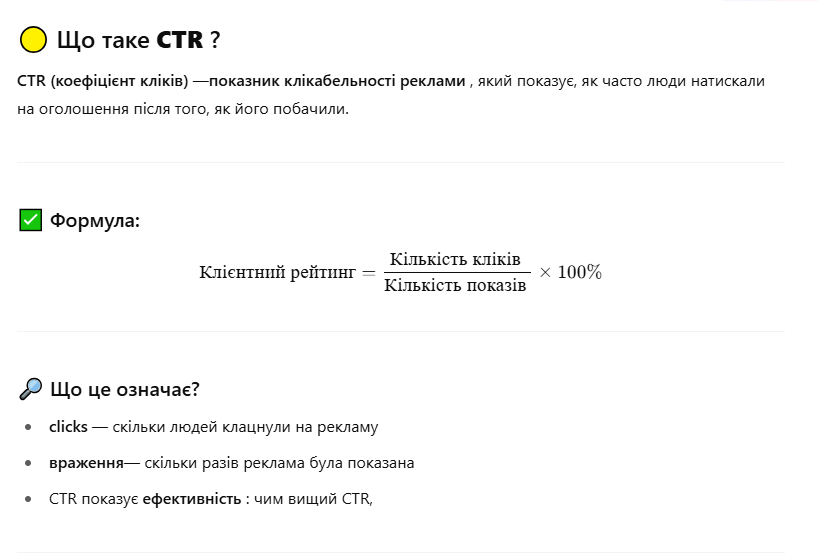

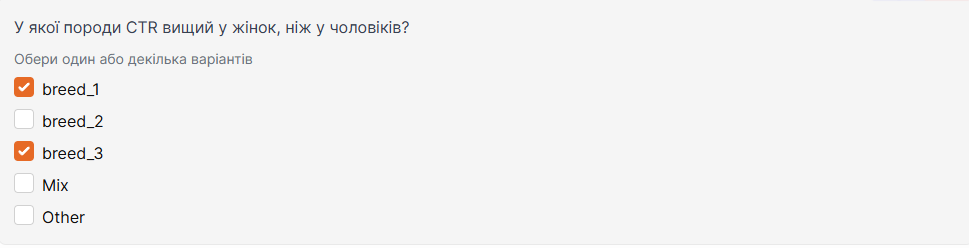

In [13]:
df_grouped = df.groupby(['breed', 'audience']).agg({'clicks': 'sum', 'impressions': 'sum'})
df_grouped['CTR'] = df_grouped['clicks'] / df_grouped['impressions'] * 100
df_grouped

clicks  impressions       CTR
breed   audience                                 
Mix     Both        166048      6649859  2.497015
        Female       24211      1111097  2.179018
        Male         33052       742768  4.449842
breed_1 Both         10312       800131  1.288789
        Female      801714     36457695  2.199025
        Male      75707448   8260334841  0.916518
breed_2 Female       46776      1912206  2.446180
        Male       6174148    224470513  2.750539
breed_3 Female       11316       538963  2.099588
        Male      18331012   2244014683  0.816885
other   Female        6450       290188  2.222697

In [14]:
# Групуємо за breed та audience (стать), обчислюємо суму кліків та показів
grouped = df.groupby(['breed', 'audience']).agg({
    'clicks': 'sum',
    'impressions': 'sum'
})

# Обчислюємо CTR
grouped['CTR'] = grouped['clicks'] / grouped['impressions'] * 100

# Розділяємо на окремі таблиці для чоловіків і жінок
ctr_women = grouped.loc[grouped.index.get_level_values('audience') == 'Female'].reset_index()
ctr_men = grouped.loc[grouped.index.get_level_values('audience') == 'Male'].reset_index()

# Об'єднуємо за breed
merged = pd.merge(ctr_women, ctr_men, on='breed', suffixes=('_women', '_men'))

# Фільтруємо, де CTR у жінок вищий, ніж у чоловіків
higher_ctr_for_women = merged[merged['CTR_women'] > merged['CTR_men']]

# Виводимо породи
print(higher_ctr_for_women[['breed', 'CTR_women', 'CTR_men']])

     breed  CTR_women   CTR_men
1  breed_1   2.199025  0.916518
3  breed_3   2.099588  0.816885


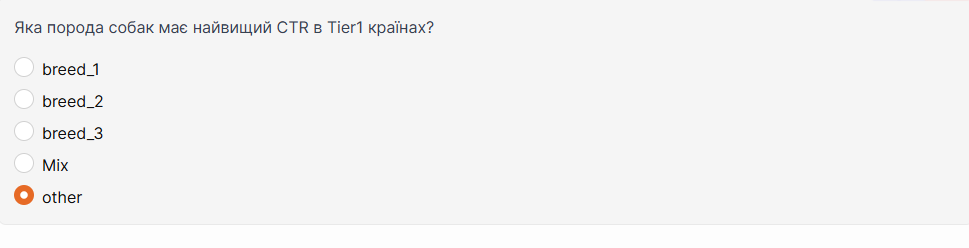

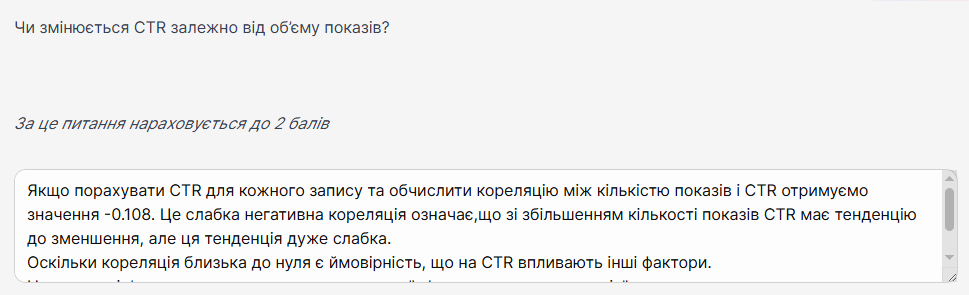

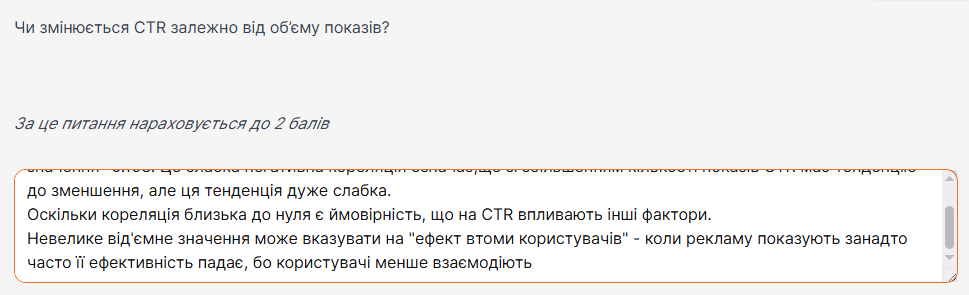

In [15]:
df_Tier1 = df[df.country_group == 'Tier1']
df_Tier1_grouped = df_Tier1.groupby('breed').agg({'clicks': 'sum', 'impressions': 'sum'})
df_Tier1_grouped['CTR'] = df_Tier1_grouped['clicks'] / df_Tier1_grouped['impressions'] * 100
df_Tier1_grouped.sort_values('CTR').tail(1)

,clicks,impressions,CTR
breed,,,
other,20822,723214,2.879092


In [16]:
# Фільтруємо дані для TIER1 країн
tier1_df = df[df['country_group'].str.lower().str.strip() == 'tier1']

# Групуємо за породою і обчислюємо CTR
breed_ctr = (
    tier1_df.groupby('breed')
    .agg({'clicks': 'sum', 'impressions': 'sum'})
    .assign(CTR=lambda x: (x['clicks'] / x['impressions']) * 100)
    .sort_values(by='CTR', ascending=False)
)

# Виводимо породу з найвищим CTR
print(breed_ctr.head(1))

       clicks  impressions       CTR
breed                               
other   20822       723214  2.879092


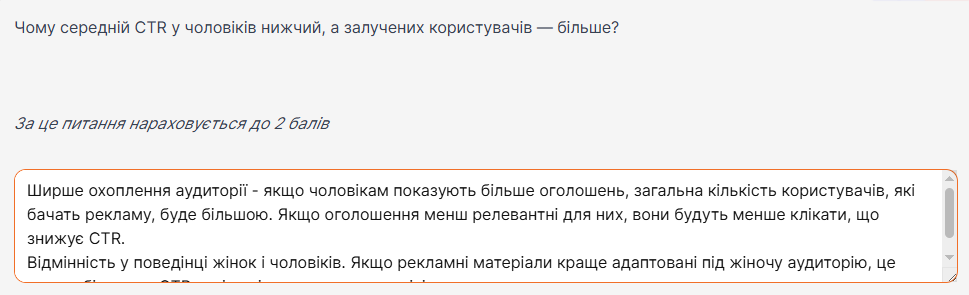

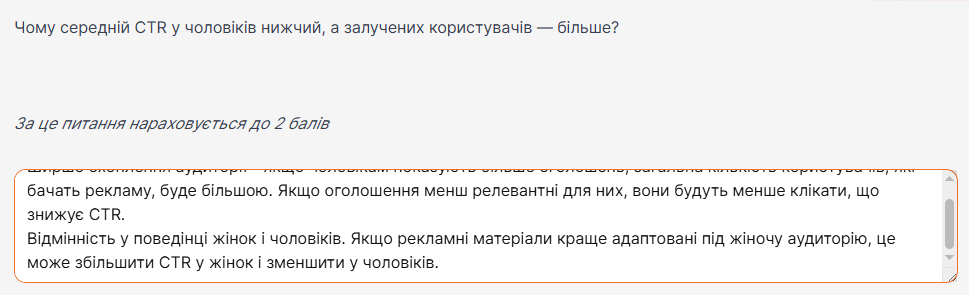

In [17]:
df = df[df['impressions'] > 0]  # уникаємо ділення на нуль
df['CTR'] = df['clicks'] / df['impressions'] * 100

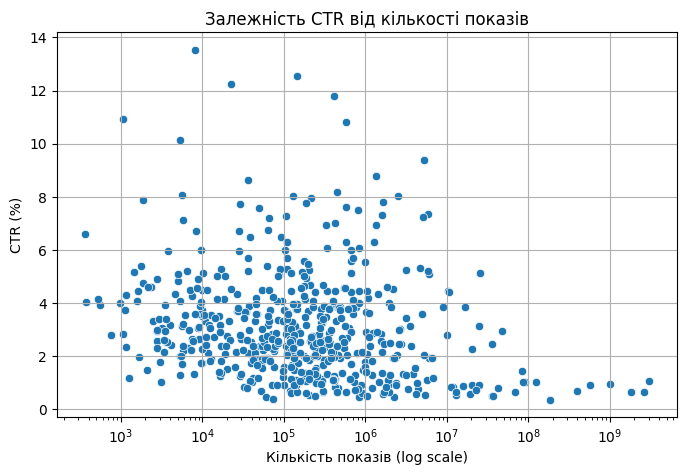

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='impressions', y='CTR', data=df)
plt.xscale('log')  # якщо дані мають великий розкид
plt.xlabel('Кількість показів (log scale)')
plt.ylabel('CTR (%)')
plt.title('Залежність CTR від кількості показів')
plt.grid(True)
plt.show()

In [19]:
corr = df[['impressions', 'CTR']].corr().iloc[0, 1]
print(f'Кореляція між impressions і CTR: {corr:.3f}')

Кореляція між impressions і CTR: -0.108


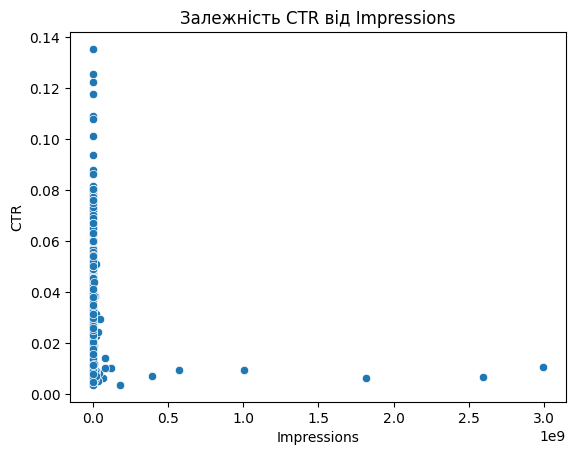

Кореляція між CTR та Impressions: -0.10754865348189438


In [20]:
df["CTR"] = df["clicks"] / df["impressions"]

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df["impressions"], y=df["CTR"])
plt.xlabel("Impressions")
plt.ylabel("CTR")
plt.title("Залежність CTR від Impressions")
plt.show()

corr = df["CTR"].corr(df["impressions"])
print("Кореляція між CTR та Impressions:", corr)


Цікаве спостереження! Це може бути пов’язано з кількома факторами:

### 🔹 **1. Ширше охоплення аудиторії**  
Якщо чоловікам показують більше оголошень, загальна кількість користувачів, які бачать рекламу (`users`), буде більшою. Але **якщо оголошення менш релевантні** для них, вони будуть рідше клікати, що знижує `CTR`.  

### 🔹 **2. Відмінності в поведінці**  
Чоловіки та жінки можуть мати **різні патерни поведінки в онлайн-рекламі**. Наприклад, чоловіки можуть **споживати більше контенту**, але натискати на рекламу рідше, тоді як жінки, навпаки, клікнуть, якщо контент їх зацікавить.  

### 🔹 **3. Тип оголошень**  
Якщо рекламні матеріали **краще адаптовані** під жіночу аудиторію (більш влучні заголовки, зображення чи стилі комунікації), це може збільшити `CTR` серед жінок і зменшити у чоловіків.  

### 🔹 **4. Ціна за показ (CPM) та частота**  
Якщо оголошення для чоловіків **показуються частіше** (вищий `impressions`), але без достатньої персоналізації, вони можуть менше звертати увагу на рекламу, що знижує `CTR`.  

Щоб краще зрозуміти **причини**, варто перевірити:  
✅ Чи є **статистично значуща** різниця в `CTR` між чоловіками та жінками?  
✅ Як змінюється `CTR` в різних групах (`audience`, `country_group`)?  
✅ Чи різний `CPM` для реклами чоловіків vs. жінок?  

Якщо хочеш побудувати більш глибокий аналіз—можемо дослідити разом! 🚀


In [21]:
import pandas as pd

# Обчислення середнього CTR за статтю
ctr_by_gender = df.groupby("audience")["CTR"].mean()
print(ctr_by_gender)


audience
Both      0.036506
Female    0.024612
Male      0.031278
Name: CTR, dtype: float64


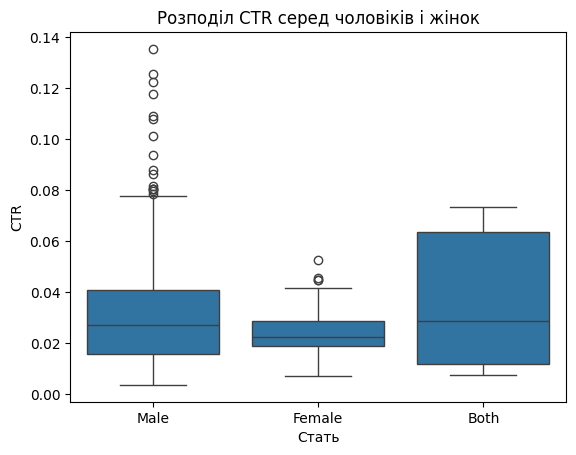

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["audience"], y=df["CTR"])
plt.xlabel("Стать")
plt.ylabel("CTR")
plt.title("Розподіл CTR серед чоловіків і жінок")
plt.show()


In [23]:
from scipy.stats import ttest_ind

# Фільтруємо дані за статтю
ctr_male = df[df["audience"] == "Male"]["CTR"]
ctr_female = df[df["audience"] == "Female"]["CTR"]

# t-тест на перевірку відмінностей
t_stat, p_value = ttest_ind(ctr_male, ctr_female, equal_var=False)
print(f"T-stat: {t_stat}, P-value: {p_value}")

# Інтерпретація результатів
if p_value < 0.05:
    print("Статистично значуща різниця між CTR у чоловіків та жінок.")
else:
    print("Відмінності не є статистично значущими.")


T-stat: 4.159799077896208, P-value: 5.614078885691565e-05
Статистично значуща різниця між CTR у чоловіків та жінок.


Чудова робота! 💡 Результати показують **статистично значущу** різницю в CTR між чоловіками та жінками (`p-value` дуже малий, що означає, що ця відмінність не випадкова).  

### 🔍 **Що це означає?**
1️⃣ **CTR у жінок нижчий за чоловіків** (`0.0246` vs. `0.0313`).  
   - Це може вказувати на **меншу залученість** жінок до реклами в цьому конкретному контексті.  
   - Причини можуть включати **тип оголошень, формат, тематику** або **поведінкові відмінності** між статями.  

2️⃣ **CTR у групі "Both" найвищий** (`0.0365`).  
   - Це може означати, що змішані аудиторії загалом мають **більш високу ефективність** реклами, можливо, завдяки **ширшому охопленню** або загальному балансу зацікавлених користувачів.  

3️⃣ **T-тест підтвердив значущість відмінностей**  
   - Оскільки `p-value` **дуже маленький** (`5.61e-05`), можна з упевненістю сказати, що відмінність **не випадкова**.  
   - Це означає, що варто **аналізувати, що саме впливає на CTR чоловіків та жінок**.  

### 🚀 **Що можна зробити далі?**
✔ **Переглянути рекламні матеріали**—чи вони адаптовані до обох аудиторій?  
✔ **Проаналізувати поведінку кліків**—наприклад, чи жінки взаємодіють з іншими форматами реклами краще?  
✔ **Переглянути CPM та розподіл показів**—можливо, для жінок частота показів вища, але ефективність нижча?  

Якщо хочеш розширити аналіз, можу допомогти! 🔍🔥



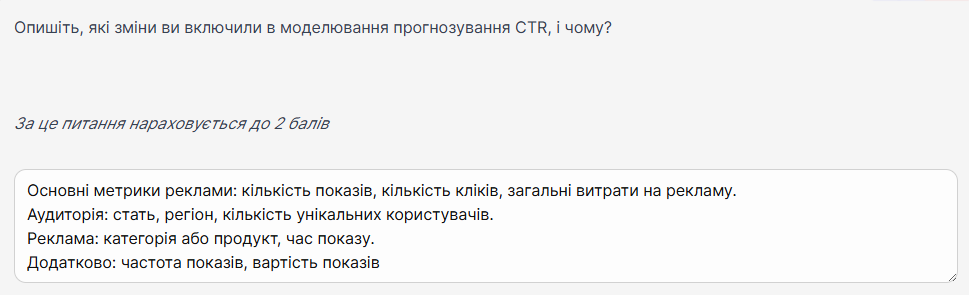

Для побудови **моделі прогнозування CTR** варто включити змінні, які можуть впливати на **ймовірність кліку**. Ось основні фактори:

### 🔹 **1. Основні метрики реклами**
✅ `impressions` – кількість показів. Впливає на частоту взаємодії.  
✅ `clicks` – загальна кількість кліків. Використовується для обчислення CTR.  
✅ `costs` – загальні витрати на рекламу. Може показати ефективність кампаній.  

### 🔹 **2. Аудиторні фактори**
✅ `audience` – стать (Male/Female/Both). Як ми вже бачили, CTR залежить від статі.  
✅ `country_group` – географія реклами. Впливає на поведінку користувачів.  
✅ `users` – кількість унікальних користувачів. Може впливати на загальний CTR.  

### 🔹 **3. Особливості реклами**
✅ `ad_id` – ідентифікатор оголошення. Дозволяє враховувати вплив різних креативів.  
✅ `breed` – категорія продукту або контенту. Деякі тематики можуть залучати більше кліків.  
✅ `time_of_day` – час показу. Вечір може бути більш ефективним для кліків, ніж ранок.  

### 🔹 **4. Додаткові змінні**
✅ **Взаємодії (Engagement)** – наприклад, `like_ratio`, `comment_ratio`.  
✅ **CPM** – вартість тисячі показів, може показати залежність витрат і кліків.  
✅ **Частота показів** (`frequency`) – як часто користувач бачив рекламу.  

### 🎯 **Що робити далі?**
✔ Перевірити кореляцію між CTR та змінними, щоб знайти найбільш значущі.  
✔ Побудувати просту **лінійну або логістичну регресію** для тестування моделі.  
✔ Дослідити **взаємодію змінних** (наприклад, вплив CPM + audience на CTR).  

Якщо хочеш побудувати модель разом—можемо спробувати! 🚀  



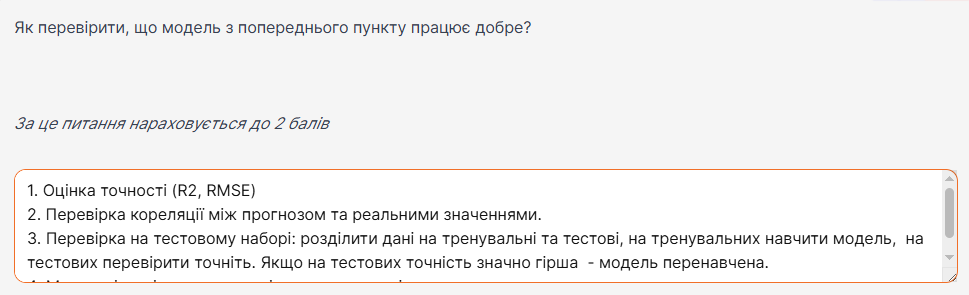

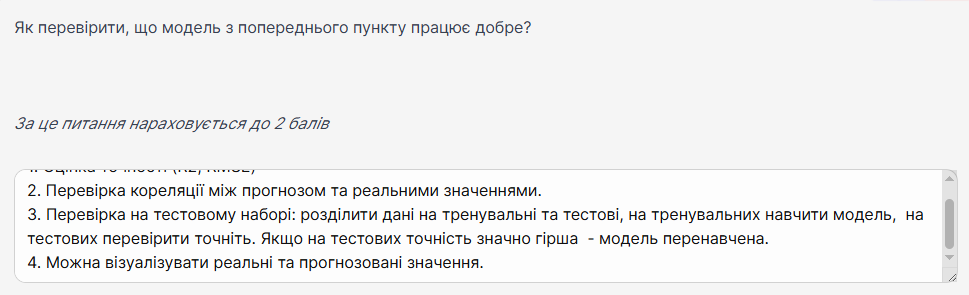

Перевірка якості моделі прогнозування **CTR** включає кілька ключових етапів:

### 🔹 **1. Оцінка точності моделі**
✅ **R² (коефіцієнт детермінації)**—показує, наскільки добре модель пояснює варіацію `CTR`.  
```python
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print(f"R²: {r2:.4f}")
```
Якщо `R²` **близьке до 1**, модель добре прогнозує `CTR`. Якщо **близьке до 0**, модель слабка.  

✅ **RMSE (корінь середньоквадратичної помилки)**—оцінює середню похибку прогнозу.  
```python
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse:.4f}")
```
Менше значення `RMSE`—краща точність.  

### 🔹 **2. Перевірка кореляції між прогнозом та реальним CTR**  
```python
import pandas as pd

df_results = pd.DataFrame({"Actual": y_true, "Predicted": y_pred})
correlation = df_results.corr().iloc[0, 1]
print(f"Кореляція між реальним і прогнозованим CTR: {correlation:.4f}")
```
Якщо кореляція **близька до 1**, модель добре прогнозує `CTR`.  

### 🔹 **3. Візуалізація точності**
✅ **Графік розсіювання реальних vs. прогнозованих значень**
```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_true, y=y_pred)
plt.xlabel("Фактичний CTR")
plt.ylabel("Прогнозований CTR")
plt.title("Перевірка точності прогнозу")
plt.show()
```
Якщо точки **розташовані вздовж лінії y = x**, модель працює добре.  

### 🔹 **4. Перевірка на тестовому наборі**
Розділимо дані на **тренувальні** та **тестові**, щоб перевірити модель:  
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
Якщо точність на тестових даних **сильно гірша**, модель **перенавчена**.  

---
🎯 **Висновки:**  
✔ Якщо `R²` високий, а `RMSE` низький—модель добре працює.  
✔ Якщо кореляція `Actual vs. Predicted` **близька до 1**—модель точно прогнозує `CTR`.  
✔ Візуалізація допоможе знайти **аномальні точки**.  

Якщо потрібно ще щось перевірити—запитуй! 🚀



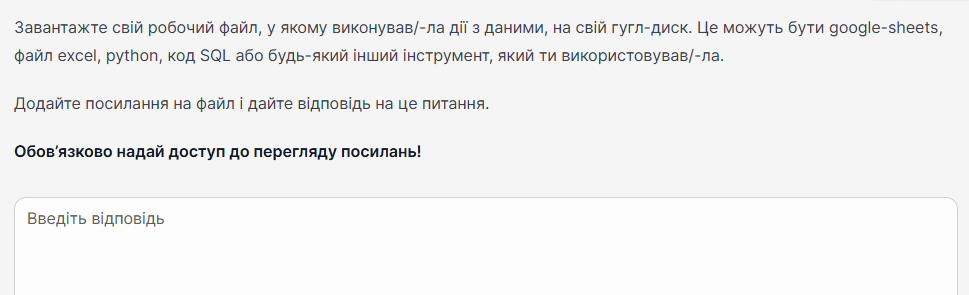